In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')
print(os.getcwd())

# from input_configuration import base_year
import toml
config = toml.load(os.path.join(os.getcwd(), 'configuration/input_configuration.toml'))

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


C:\Workspace\sc_2023_11_05_24


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tours per Person

In [4]:

df = load_data('tour_purpose_mode')
_df = df.groupby('source').sum()[['toexpfac']].T
_df.rename(index={'toexpfac':'Average Tours'}, inplace=True)

df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(index={'psexpfac':'Average Tours'}, inplace=True)

_df/_df_person

source,model,survey
Average Tours,1.39,1.29


# Percent of Tours by Purpose

source,model,survey
pdpurp,,
Escort,12.9%,13.0%
Meal,11.3%,7.8%
Personal Business,5.9%,6.0%
School,9.5%,10.2%
Shop,11.1%,11.8%
Social,23.4%,25.0%
Work,25.9%,26.2%


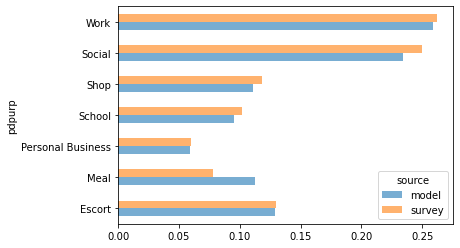

In [5]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = _df/_df_sum
# _df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df.plot(kind='barh', alpha=0.6)
_df

# Tours per Person by Purpose

source,model,survey
pdpurp,,
Escort,0.18,0.17
Meal,0.16,0.10
Personal Business,0.08,0.08
School,0.13,0.13
Shop,0.15,0.15
Social,0.33,0.32
Work,0.36,0.34


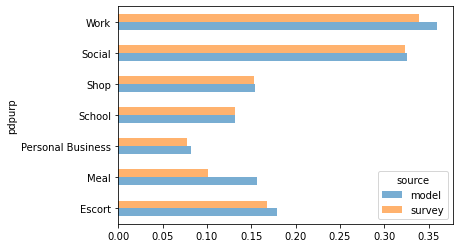

In [6]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
# Total population
df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(columns={'psexpfac': 'toexpfac'}, inplace=True)
# _df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df = _df/_df_person.values
_df.plot(kind='barh', alpha=0.6)
_df

# Tours by Person Type

source,model,survey
pptyp,,
Child Age 0-4,"279,211","232,861"
Child Age 5-15,"585,550","517,918"
Full-Time Worker,"2,541,694","2,071,449"
High School Student Age 16+,"234,986","237,636"
Non-Working Adult Age 65+,"668,788","545,290"
Non-Working Adult Age <65,"951,113","823,362"
Part-Time Worker,"667,496","572,758"
University Student,"122,962","94,052"


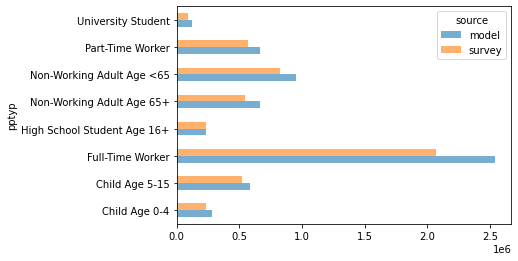

In [7]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')

df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

## Work Tours by Person Type

source,model,survey
pptyp,,
Full-Time Worker,"1,286,045","1,088,987"
High School Student Age 16+,"20,585","14,888"
Part-Time Worker,"239,222","198,978"
University Student,"20,355","19,730"


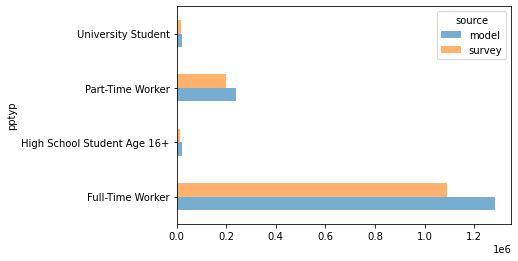

In [8]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df